In [43]:
## Analysis

## 1. From the bubble plot we can see that the average fare is higer in rural and suburban areas, this is probably due to longer ride distance.
## 2. The three pie charts show that urban cities account for about 2/3's of total fares and total rides and around 4/5's of total drivers.
## 3. It appears that there is direct relation between number of rides and number of drivers in Urban area.  The higher number of rides calls for a higher need for drivers.
## 4. From this data you can assume that there are more new opportunities to expand a business in suburban and rural cities.

In [44]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data = pd.read_csv("../Resources/city_data.csv")
ride_data = pd.read_csv("../Resources/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

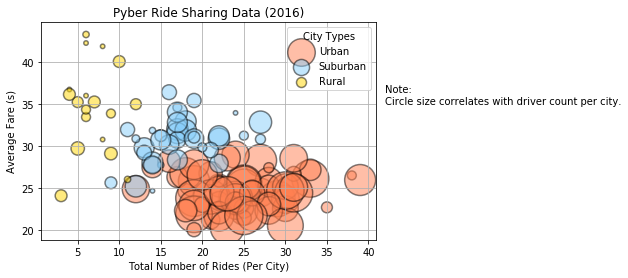

In [45]:
# Obtain the x and y coordinates for each of the three city types

#average fare per city.
average_fare = combined_data.groupby("city")["fare"].mean()
#average_fare.head(20)

#total rides per city.
total_rides = combined_data.groupby("city")["ride_id"].count()
#total_rides.head(20)

#total number of drivers per city.
total_drivers = combined_data.groupby("city")["driver_count"].mean()
#total_drivers.head(20)

city_type = city_data.set_index('city')['type']
#city_type.value_counts()
    
combined_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type})
#combined_cities.head()    

#Urban
urban = combined_cities.loc[combined_cities["City Type"]== "Urban"]
#suburban
suburban = combined_cities.loc[combined_cities["City Type"]== "Suburban"]
#rural
rural = combined_cities.loc[combined_cities["City Type"]== "Rural"]

# Build the scatter plots for each city types
#Urban
u = plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], 
            color = "coral", edgecolors="black", s = urban["Number of Drivers"]*20, 
            label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
s = plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], 
            color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, 
            label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
r = plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], 
            color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*20, 
            label = "Rural", alpha = 0.5, linewidth = 1.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (s)")
plt.grid()

# Create a legend
plt.legend(loc="upper right", title="City Types")

# Incorporate a text label regarding circle size
plt.text(42, 35,"Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Pyber_Ride_Sharing_Data_2016.png")
plt.show()

## Total Fares by City Type

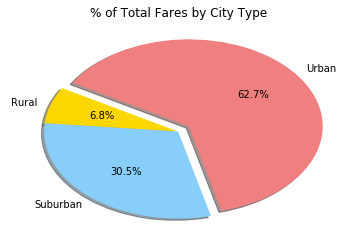

In [46]:
# Calculate Type Percents
total_fare_pie = combined_data.groupby(["type"])["fare"].sum()
total_fare_pie.index

# Build Pie Chart
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(total_fare_pie, explode = explode, 
        labels = total_fare_pie.index, colors = colors, 
        autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Percent_Total_Fares_by_City_Type.png")
plt.show()

## Total Rides by City Type

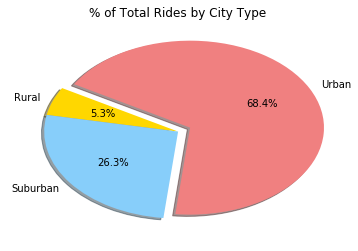

In [47]:
# Calculate Ride Percents
total_rides_pie = combined_data.groupby(["type"])["ride_id"].count()
total_rides_pie.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(total_rides_pie, explode = explode, 
        labels = total_fare_pie.index, colors = colors, 
        autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Percent_Total_Rides_by_City_Type.png")
plt.show()

## Total Drivers by City Type

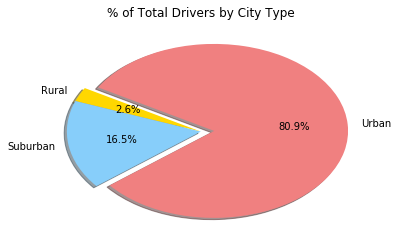

In [48]:
# Calculate Driver Percents
total_city_drivers_pie = city_data.groupby(["type"])["driver_count"].sum()
total_city_drivers_pie.index

# Build Pie Charts
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(total_city_drivers_pie, explode = explode, 
        labels = total_fare_pie.index, colors = colors, 
        autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Percent_Total_Drivers_by_City_Type.png")
plt.show()